In [69]:
%config IPCompleter.greedy=True

In a solar panel efficiency study, researchers want to investigate the relationship between the temperature and the efficiency of solar panels. They collected data on the temperature (in Celsius) and the corresponding efficiency (in percentage) of solar panels over a period of time. The dataset contains measurements from 50 different days.
- Using Simple Linear Regression, can you develop a model to predict the efficiency of solar panels based on the temperature?
- Perform an F-test to determine whether temperature significantly predicts the efficiency of solar panels.
- Conduct a t-test to assess the significance of the regression coefficient for temperature.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [71]:
df = pd.read_csv("datasets/solar_efficiency_temp.csv")
df.head()

,temperature,efficiency
0,27.440675,65.188987
1,35.759468,87.633611
2,30.138169,72.520823
3,27.244159,71.431708
4,21.182740,64.327393


In [72]:
X = df[["temperature"]]
Y = df["efficiency"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [73]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [74]:
Y_pred = model.predict(X_test)

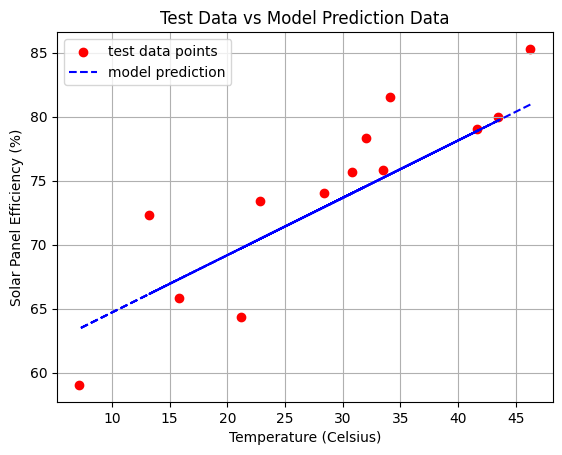

In [75]:
plt.scatter(X_test, Y_test, color="red", marker="o", label="test data points")
plt.plot(X_test, Y_pred, color="blue", linestyle="--", label="model prediction")
plt.title("Test Data vs Model Prediction Data")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Solar Panel Efficiency (%)")
plt.grid()
plt.legend()

In [76]:
reg_coefficient = model.coef_
reg_intercept = model.intercept_

In [77]:
mse = mean_squared_error(Y_pred, Y_test)
r2 = r2_score(Y_pred, Y_test)

In [78]:
print(f"Regression Coefficient for Temperature = {reg_coefficient[0]}")
print(f"Regression Intercept = {reg_intercept}")
print(f"Mean Squared error = {mse}")
print(f"Coefficient of Determination = {r2}")

Regression Coefficient for Temperature = 0.4474046341979206
Regression Intercept = 60.233643218029265
Mean Squared error = 13.184913541739215
Coefficient of Determination = 0.5033578742139719


In [79]:
import statsmodels.api as sm

In [80]:
model = sm.OLS(Y, X).fit()
X = sm.add_constant(X)

In [81]:
t_stat = model.tvalues["temperature"]
p_value_t = model.pvalues["temperature"]

f_stat = model.fvalue
p_value_f = model.f_pvalue

if p_value_t < 0.05:
    print("Temperature is a significant predictor of Solar Panel efficiency.")
else:
    print("Temperature is NOT a significant predictor of Solar Panel efficiency.")

if p_value_f < 0.05:
    print("The overall model and the regression coefficient are statistically significant")
else:
    print("The overall model and the regression coefficient are NOT statistically significant")

Temperature is a significant predictor of Solar Panel efficiency.
The overall model and the regression coefficient are statistically significant
